In [56]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.rc("font",size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split#splitting data arr into two subsets
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
from sklearn.metrics import accuracy_score,classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve 
from sklearn.metrics import f1_score
from sklearn.metrics import auc

In [57]:
stroke=pd.read_csv('../datasets/full_checkup/stroke-dataset.csv')
stroke

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [58]:
stroke.shape

(5110, 11)

In [59]:
stroke.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [60]:
#checking the null values
stroke.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [61]:
stroke[stroke==0].count()

gender                  0
age                     0
hypertension         4612
heart_disease        4834
ever_married            0
work_type               0
Residence_type          0
avg_glucose_level       0
bmi                     0
smoking_status          0
stroke               4861
dtype: int64

<Axes: ylabel='count'>

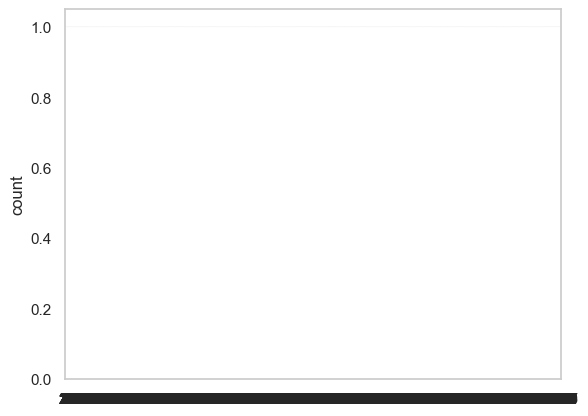

In [62]:
sns.countplot(stroke['stroke'])

In [63]:
#filling null values with the mean
stroke['bmi'].fillna(stroke['bmi'].mean(), inplace= True)

C:\Users\Josia Given S\AppData\Local\Temp\ipykernel_4608\2602365785.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  stroke['bmi'].fillna(stroke['bmi'].mean(), inplace= True)


In [64]:
#filling null values with mode
stroke['smoking_status'].fillna(stroke['smoking_status'].mode()[0], inplace=True)

C:\Users\Josia Given S\AppData\Local\Temp\ipykernel_4608\2141728243.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  stroke['smoking_status'].fillna(stroke['smoking_status'].mode()[0], inplace=True)


In [65]:
#checking the data
stroke.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [66]:
stroke.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,22.612647,0.296607,0.226063,45.283560,7.698018,0.215320
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.245000,23.800000,0.000000
50%,45.000000,0.000000,0.000000,91.885000,28.400000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,32.800000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [67]:
stroke.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                5110 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


C:\Users\Josia Given S\AppData\Local\Temp\ipykernel_4608\4219846767.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(stroke['avg_glucose_level'], bins=20)


<Axes: xlabel='avg_glucose_level', ylabel='Density'>

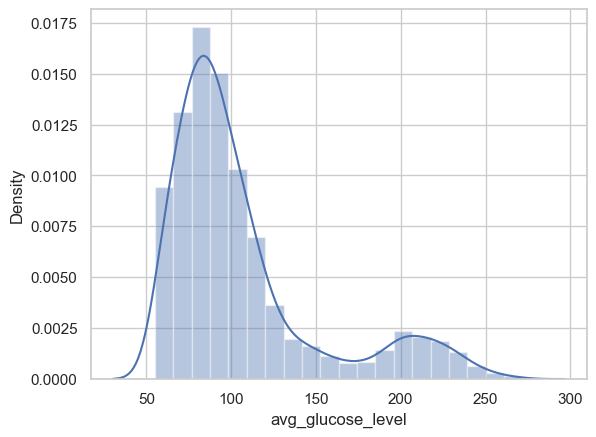

In [68]:
sns.distplot(stroke['avg_glucose_level'], bins=20)

C:\Users\Josia Given S\AppData\Local\Temp\ipykernel_4608\1423296739.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(stroke['bmi'], bins=20)


<Axes: xlabel='bmi', ylabel='Density'>

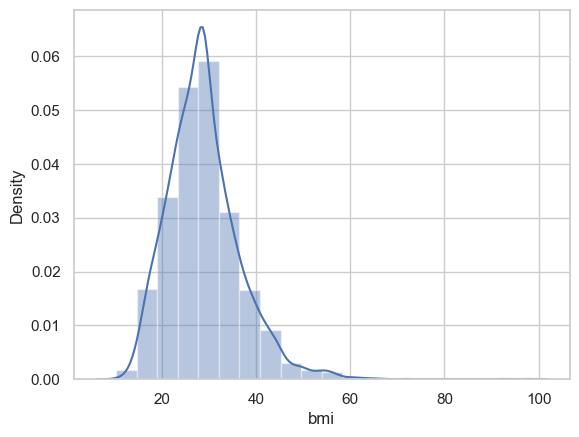

In [69]:
sns.distplot(stroke['bmi'], bins=20)

C:\Users\Josia Given S\AppData\Local\Temp\ipykernel_4608\765895098.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(stroke['age'], bins=20)


<Axes: xlabel='age', ylabel='Density'>

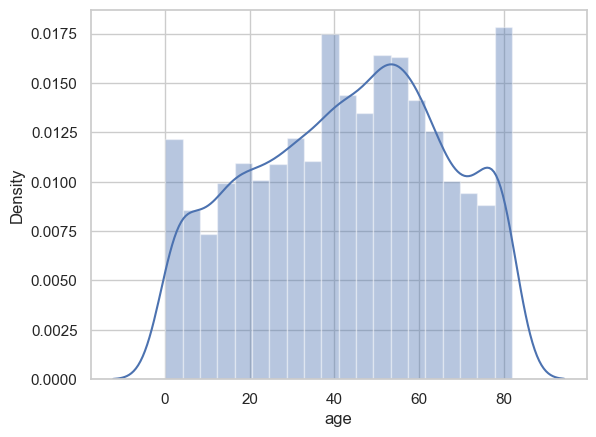

In [70]:
sns.distplot(stroke['age'], bins=20)

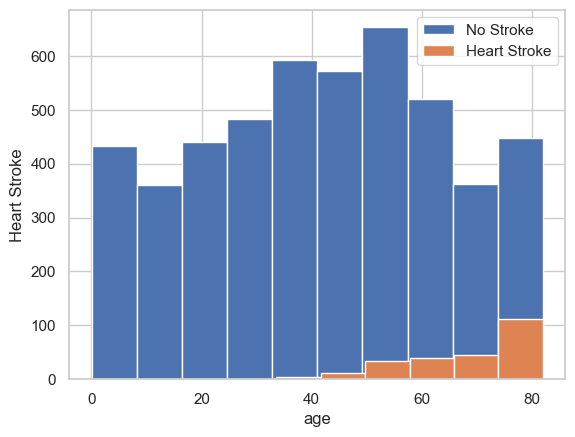

In [71]:
#does age has impact on strokes  SO ans->yes
#chances of stroke increases with increases in age
stroke.loc[stroke['stroke'] == 0,'age'].hist(label='No Stroke')
stroke.loc[stroke['stroke'] == 1,'age'].hist(label='Heart Stroke')
plt.xlabel('age')
plt.ylabel('Heart Stroke')
plt.legend()

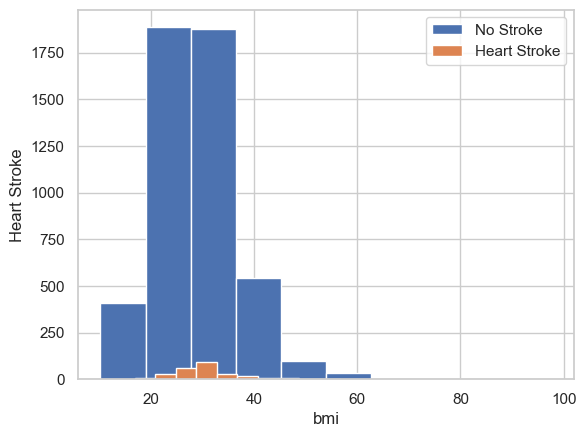

In [72]:
#chances of stroke more with bmi 20-40
stroke.loc[stroke['stroke'] == 0,'bmi'].hist(label='No Stroke')
stroke.loc[stroke['stroke'] == 1,'bmi'].hist(label='Heart Stroke')
plt.xlabel('bmi')
plt.ylabel('Heart Stroke')
plt.legend()

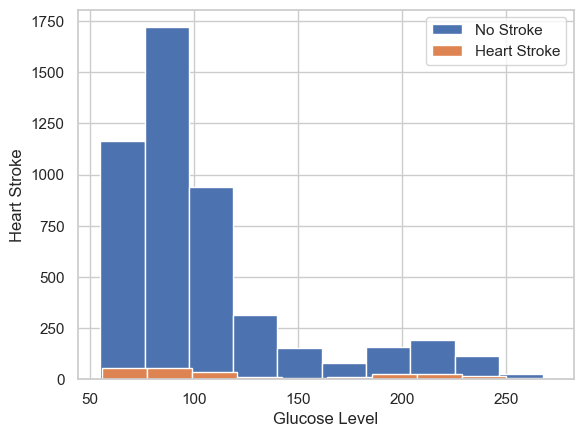

In [73]:
#chances of stroke high with glucose levels in range of 70-100
stroke.loc[stroke['stroke'] == 0,'avg_glucose_level'].hist(label='No Stroke')
stroke.loc[stroke['stroke'] == 1,'avg_glucose_level'].hist(label='Heart Stroke')
plt.xlabel('Glucose Level')
plt.ylabel('Heart Stroke')
plt.legend()

In [74]:
#married females have more chances of heart stroke than married males
pd.pivot_table(stroke, index= 'stroke', columns='gender', values='ever_married', aggfunc= 'count')

gender,Female,Male,Other
stroke,,,
0,2853.0,2007.0,1.0
1,141.0,108.0,NaN


In [75]:
#females with hypertension has more chance of heart stroke than males having hypertension problem
pd.pivot_table(stroke, index= 'stroke', columns='gender', values='hypertension', aggfunc= 'count')

gender,Female,Male,Other
stroke,,,
0,2853.0,2007.0,1.0
1,141.0,108.0,NaN


In [76]:
#females with heart disease has more chances of stroke
pd.pivot_table(stroke, index= 'stroke', columns='gender', values='heart_disease', aggfunc= 'count')

gender,Female,Male,Other
stroke,,,
0,2853.0,2007.0,1.0
1,141.0,108.0,NaN


In [77]:
#people having private jobs and has a habit of smoking has more chance of heart stroke 
pd.pivot_table(stroke, index= 'stroke', columns='work_type', values='smoking_status', aggfunc= 'count')

work_type,Govt_job,Never_worked,Private,Self-employed,children
stroke,,,,,
0,624.0,22.0,2776.0,754.0,685.0
1,33.0,NaN,149.0,65.0,2.0


(array([-0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ,  1.2]),
 [Text(-0.2, 0, '−0.2'),
  Text(0.0, 0, '0.0'),
  Text(0.2, 0, '0.2'),
  Text(0.4000000000000001, 0, '0.4'),
  Text(0.6000000000000001, 0, '0.6'),
  Text(0.8, 0, '0.8'),
  Text(1.0000000000000002, 0, '1.0'),
  Text(1.2000000000000002, 0, '1.2')])

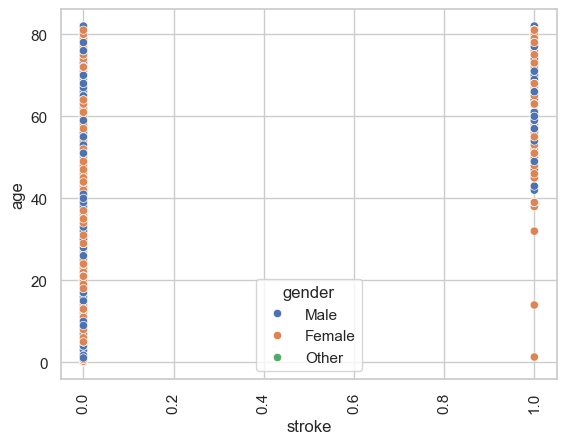

In [78]:
#as age incraeses gender does not play any role in heart stroke
sns.scatterplot(x= 'stroke', y='age', hue='gender', sizes= (15,200), data=stroke)
plt.xticks(rotation=90)

(array([-0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ,  1.2]),
 [Text(-0.2, 0, '−0.2'),
  Text(0.0, 0, '0.0'),
  Text(0.2, 0, '0.2'),
  Text(0.4000000000000001, 0, '0.4'),
  Text(0.6000000000000001, 0, '0.6'),
  Text(0.8, 0, '0.8'),
  Text(1.0000000000000002, 0, '1.0'),
  Text(1.2000000000000002, 0, '1.2')])

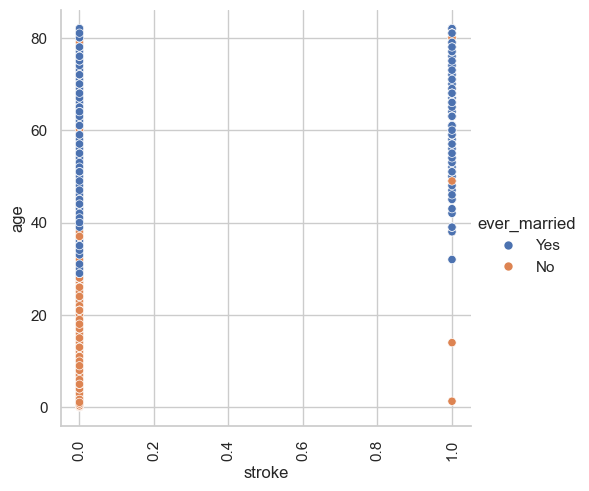

In [79]:
#can't say that marriage plays a role in heart stroke as people generally marry after the age of 25years
sns.relplot(x= 'stroke', y='age', hue= 'ever_married', sizes= (15,200), data=stroke)
plt.xticks(rotation=90)

(array([  0.,  50., 100., 150., 200., 250., 300.]),
 [Text(0.0, 0, '0'),
  Text(50.0, 0, '50'),
  Text(100.0, 0, '100'),
  Text(150.0, 0, '150'),
  Text(200.0, 0, '200'),
  Text(250.0, 0, '250'),
  Text(300.0, 0, '300')])

<Figure size 2800x2000 with 0 Axes>

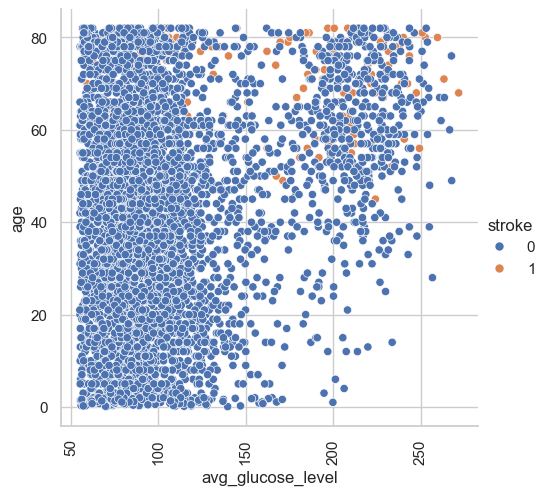

In [80]:
#with age glucose level increases which increases the chances of stroke
plt.figure(figsize=(28,20))
sns.relplot(x= 'avg_glucose_level', y='age', hue= 'stroke', sizes= (15,200), data=stroke)
plt.xticks(rotation=90)

In [81]:
stroke['stroke'].value_counts()

stroke
0    4861
1     249
Name: count, dtype: int64

In [82]:
#ENCODING THE DATASETS
from sklearn import preprocessing 
encoder = preprocessing.LabelEncoder()
for i in stroke.columns:
        if isinstance(stroke[i][0], str):
            stroke[i] = encoder.fit_transform(stroke[i])

In [83]:
#STANDARDIZING
from sklearn.preprocessing import StandardScaler 
scalar = StandardScaler() 
scalar.fit(stroke) 
scaled_data = scalar.transform(stroke)

In [84]:
#creating a model
X= stroke.drop('stroke', axis=1)
X.shape

(5110, 10)

In [85]:
y= stroke['stroke']
y.shape

(5110,)

In [86]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
np.random.seed(0)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.3, random_state = 100)

In [87]:
log = LogisticRegression()

In [88]:
log.fit(X_train,y_train)

c:\Users\Josia Given S\.pyenv\pyenv-win\versions\3.12.7\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [89]:
log.score(X_train, y_train)

0.9496785015376014

In [90]:
#this model shows that it is overfit which is considering the high data so that we have to balance the data by some models(i.e) logistic regression

In [91]:
#to retain the original data, we craeted a copy of the dataset
stroke_copy= stroke.copy()

In [92]:
stroke_copy.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,228.69,36.600000,1,1
1,0,61.0,0,0,1,3,0,202.21,28.893237,2,1
2,1,80.0,0,1,1,2,0,105.92,32.500000,2,1
3,0,49.0,0,0,1,2,1,171.23,34.400000,3,1
4,0,79.0,1,0,1,3,0,174.12,24.000000,2,1


In [93]:
#creating a list of data values which is more in number to make a balance data
li = list(stroke_copy[stroke_copy.stroke == 0].sample(n=2000).index)
stroke_copy['stroke'].value_counts() 


stroke
0    4861
1     249
Name: count, dtype: int64

In [94]:
stroke = pd.DataFrame(stroke)
stroke.reset_index()

,index,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,1,67.0,0,1,1,2,1,228.69,36.600000,1,1
1,1,0,61.0,0,0,1,3,0,202.21,28.893237,2,1
2,2,1,80.0,0,1,1,2,0,105.92,32.500000,2,1
3,3,0,49.0,0,0,1,2,1,171.23,34.400000,3,1
4,4,0,79.0,1,0,1,3,0,174.12,24.000000,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,5105,0,80.0,1,0,1,2,1,83.75,28.893237,2,0
5106,5106,0,81.0,0,0,1,3,1,125.20,40.000000,2,0
5107,5107,0,35.0,0,0,1,3,0,82.99,30.600000,2,0
5108,5108,1,51.0,0,0,1,2,0,166.29,25.600000,1,0


In [95]:
X = stroke.drop(['stroke'], axis=1).values 
y = stroke['stroke'].values
X.shape


(5110, 10)

In [96]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3,random_state=1000)


In [97]:
log.fit(X_train, y_train)

c:\Users\Josia Given S\.pyenv\pyenv-win\versions\3.12.7\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [98]:
#the accuracy has dropped
log.score(X_test, y_test)

0.9478147423352903

In [99]:
#predicting the output with Logistic
y_underlog = log.predict(X)

In [100]:
print('The accuracy score of the model is:', accuracy_score(y,y_underlog)*100)
print('The F1 score of the model is:', f1_score(y, y_underlog)*100)
print('The recall score of the model is:', recall_score(y, y_underlog)*100)
print('The confusion matrix of the model is:', confusion_matrix(y, y_underlog))
print('The classification report of logistic model is:', classification_report(y, y_underlog))

The accuracy score of the model is: 95.14677103718199
The F1 score of the model is: 0.8
The recall score of the model is: 0.4016064257028112
The confusion matrix of the model is: [[4861    0]
 [ 248    1]]
The classification report of logistic model is:               precision    recall  f1-score   support

           0       0.95      1.00      0.98      4861
           1       1.00      0.00      0.01       249

    accuracy                           0.95      5110
   macro avg       0.98      0.50      0.49      5110
weighted avg       0.95      0.95      0.93      5110



In [101]:
cm_log= confusion_matrix(y, y_underlog)

<Axes: title={'center': 'Logistic Regression Confusion Matrix'}>

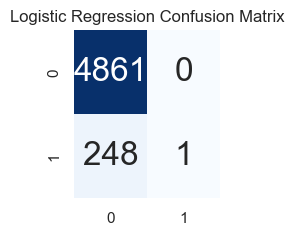

In [102]:
plt.subplot(2,3,1)
plt.title("Logistic Regression Confusion Matrix")
sns.heatmap(cm_log,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

In [103]:
from joblib import dump

# Simpan model menggunakan joblib
dump(log, "../../models/full_checkup/stroke_model.joblib")

['../../models/full_checkup/stroke_model.joblib']

In [104]:
log.score(X_test, y_test)

0.9478147423352903

In [105]:
from joblib import load

# Load the model
MODEL_PATH = "../../models/full_checkup/stroke_model.joblib"
model = load(MODEL_PATH)

# Check if the model has attribute to list feature names
try:
    # Menggunakan feature_names_in_ untuk menampilkan fitur input, jika ada
    if hasattr(model, 'feature_names_in_'):
        print("Input Features (from feature_names_in_):")
        feature_names = model.feature_names_in_
    # Jika menggunakan pipeline, cari fitur di dalam step pertama (misalnya StandardScaler atau preprocessor lainnya)
    elif hasattr(model, 'steps'):
        feature_names = model.steps[0][1].feature_names_in_
        print("Input Features (from pipeline preprocessor):")
    else:
        raise AttributeError("Model tidak memiliki fitur 'feature_names_in_' atau merupakan pipeline dengan preprocessor.")
    
    # Display feature names
    for idx, feature in enumerate(feature_names, start=1):
        print(f"{idx}. {feature}")

except AttributeError as e:
    print("Error:", str(e))
    print("Pastikan model memiliki atribut input feature atau gunakan pipeline yang menyimpan informasi preprocessor.")


Error: Model tidak memiliki fitur 'feature_names_in_' atau merupakan pipeline dengan preprocessor.
Pastikan model memiliki atribut input feature atau gunakan pipeline yang menyimpan informasi preprocessor.
